Example with the moon scikit-learn dataset:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)]
Levelvector:  [1 4]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 1)
Domain:  [0.0, 0.0] [1.0, 0.125]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Domain:  [0.0, 0.0] [1.0, 0.1875]
Result:  0.0034740708360727433
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
-----------------------------------------------------------------------

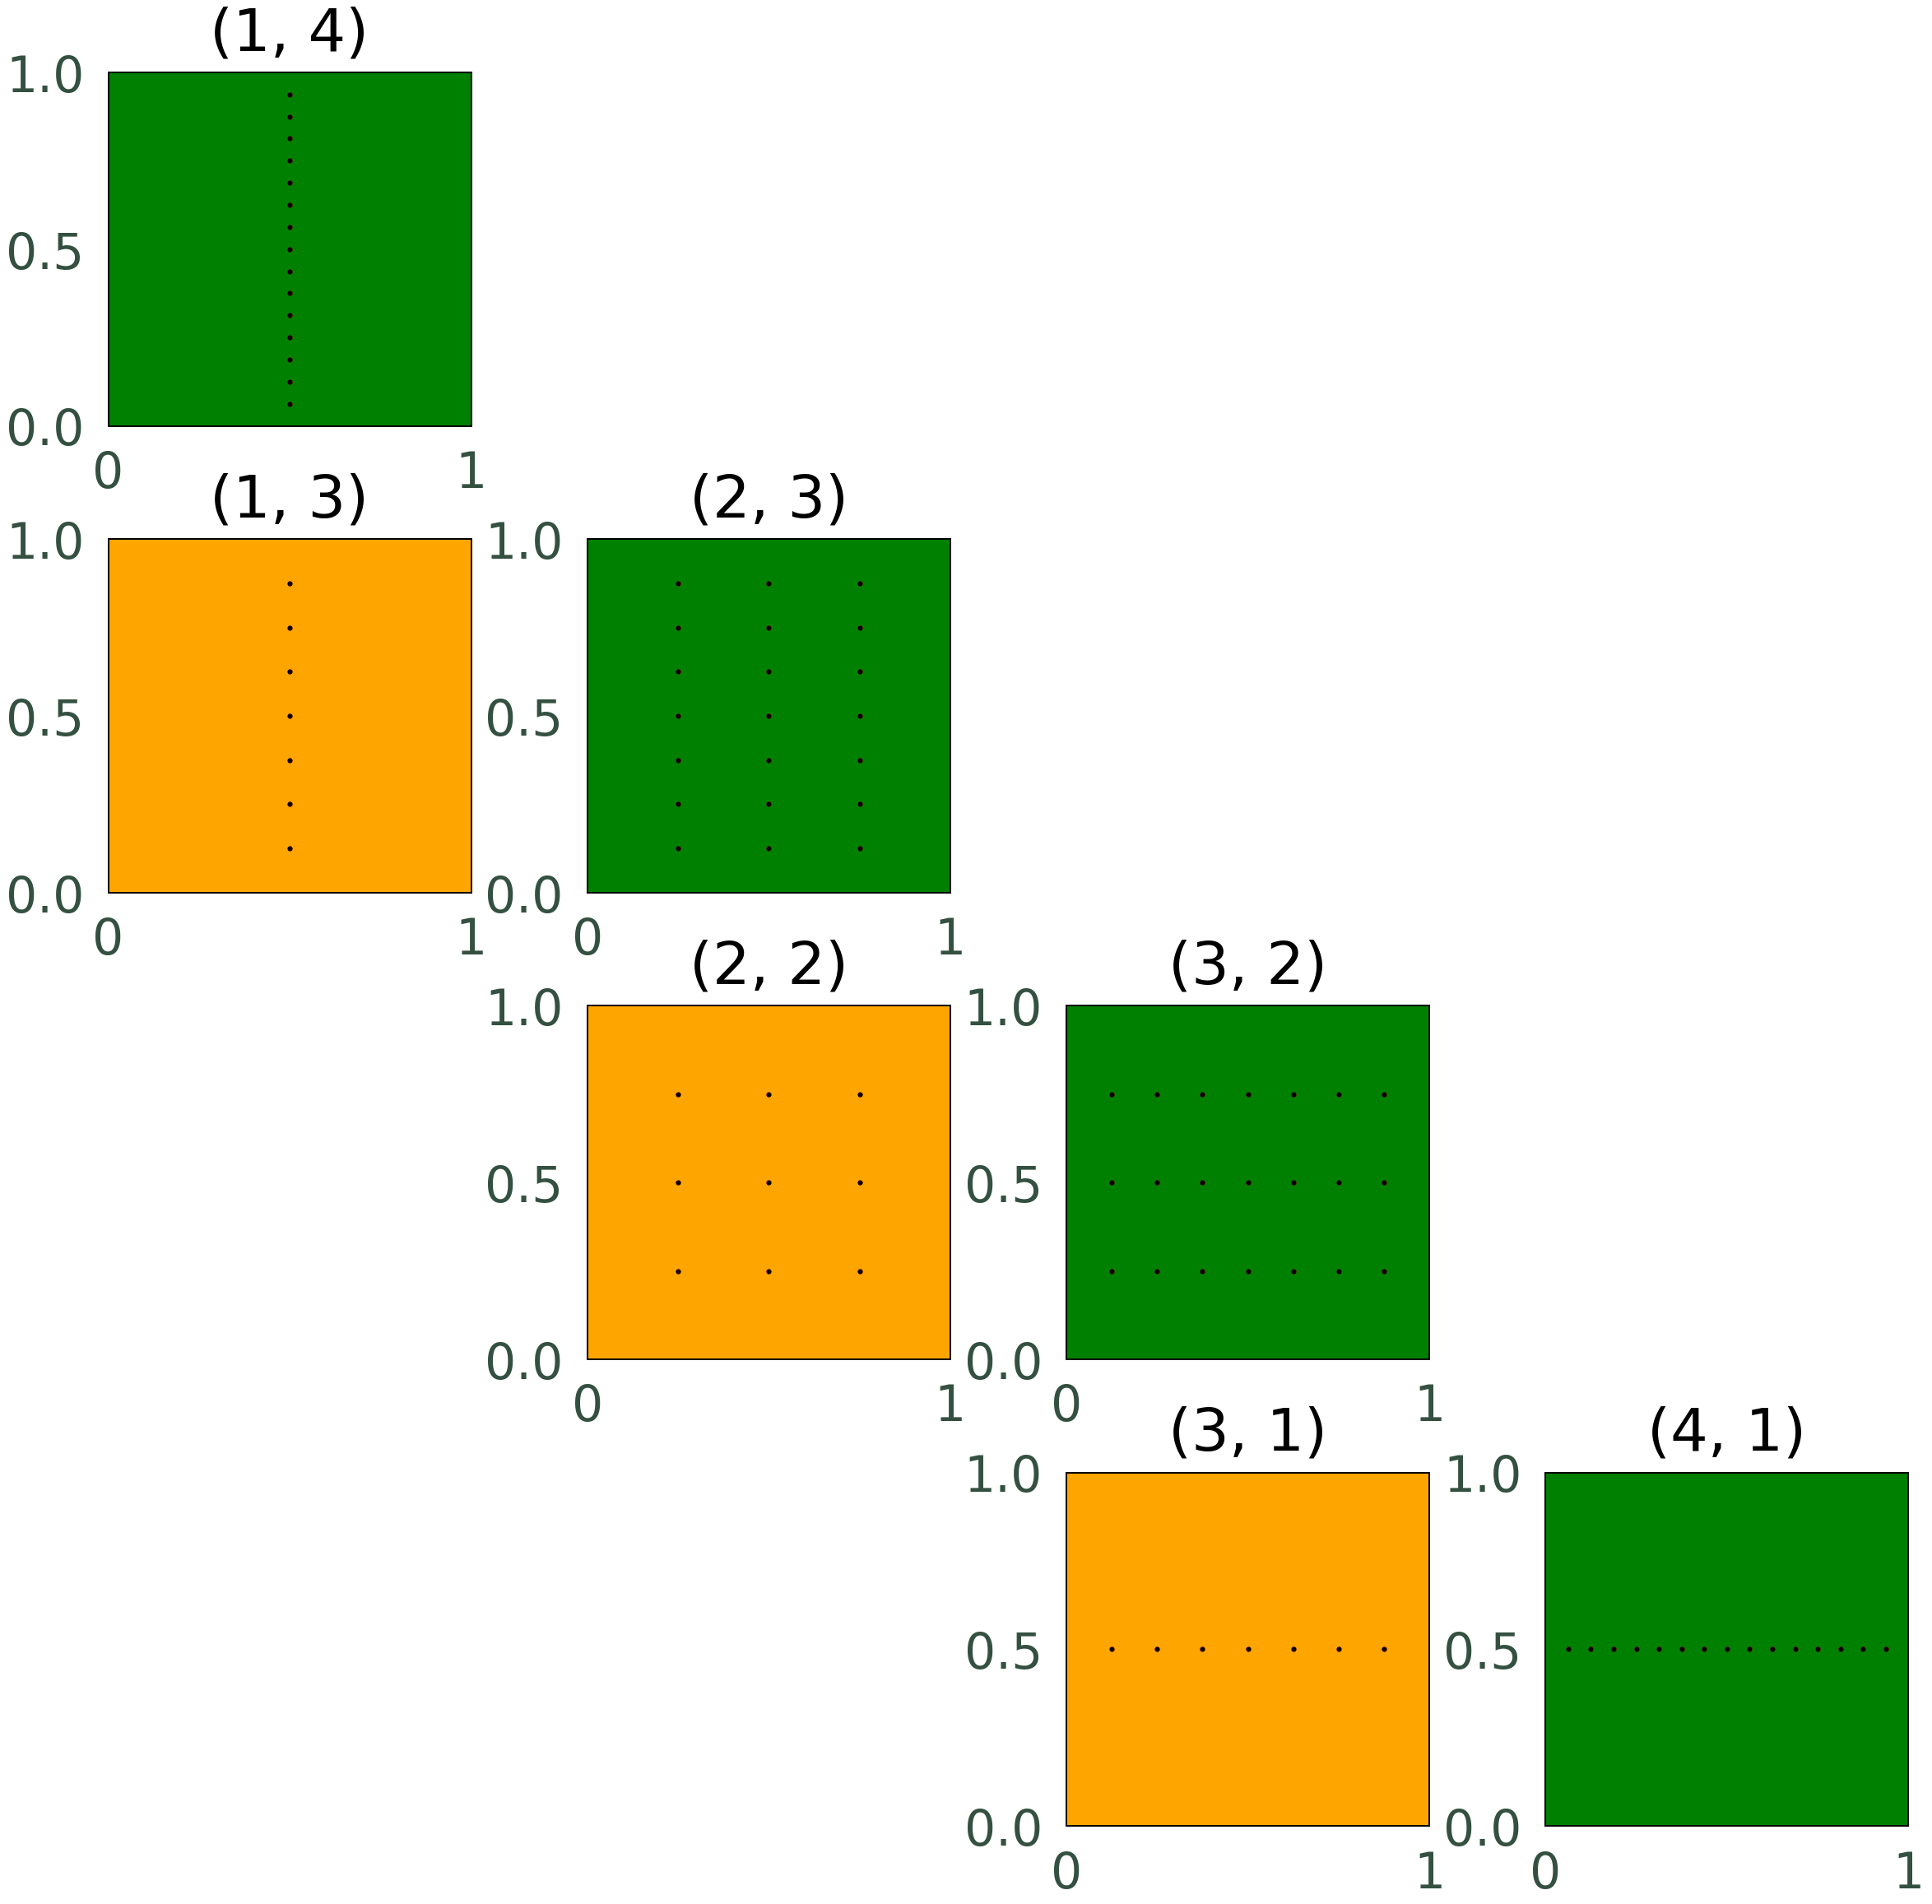

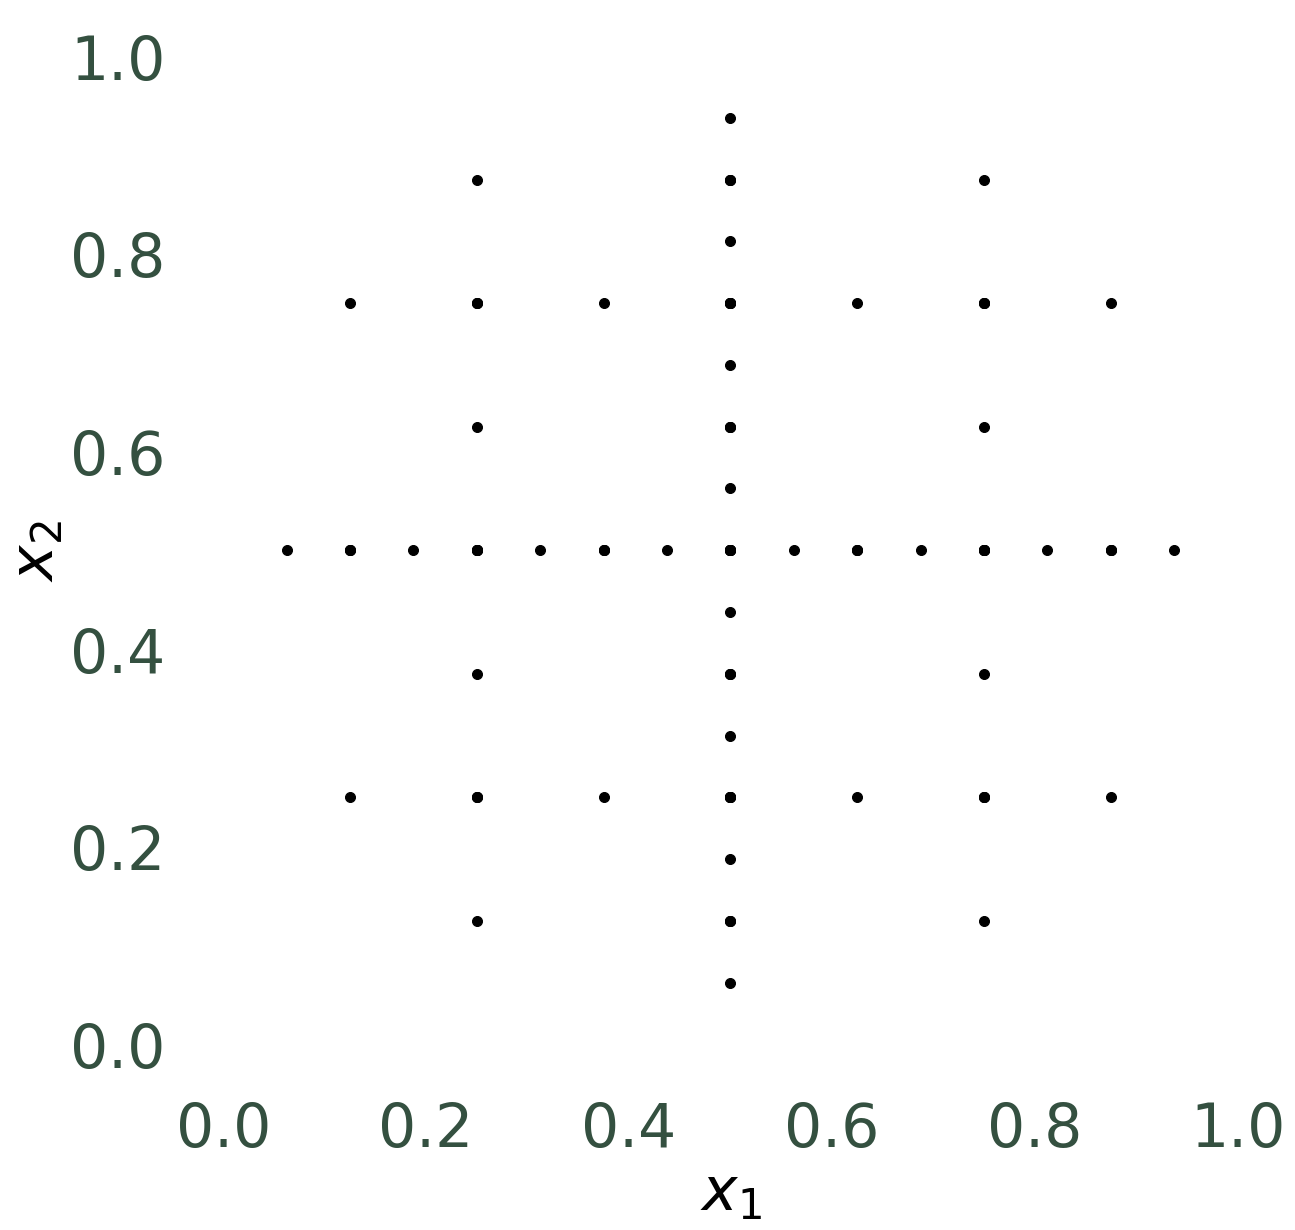

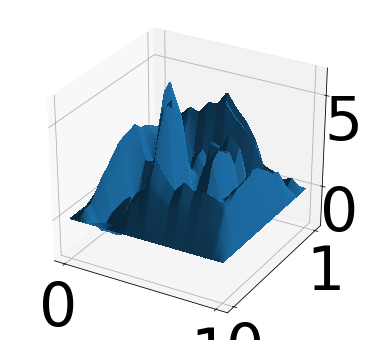

In [1]:
%matplotlib inline
from sys import path
import numpy as np
from ErrorCalculator import *
from GridOperation import *
from StandardCombi import *
from sklearn import datasets

# dimension of the problem
dim = 2

# define the domain boundaries
a = np.zeros(dim)
b = np.ones(dim)

# define the data
data = datasets.make_moons(noise = 0.05)

# initialize the grid operation
operation = DensityEstimation(data, dim)

# initialize the StandardCombi with the DE
combiObject = StandardCombi(a, b, operation=operation)

# define the min and max level of the combi grid
minimum_level = 1
maximum_level = 4

# calculation and output
combiObject.perform_operation(minimum_level, maximum_level)
print("Combination Scheme:")
combiObject.print_resulting_combi_scheme(markersize=5)
print("Sparse Grid:")
combiObject.print_resulting_sparsegrid(markersize=10)
print("Plot of combimodel for function:")
combiObject.plot()

Example with the circle scikit-learn dataset:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)]
Levelvector:  [1 4]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 1)
Domain:  [0.0, 0.0] [1.0, 0.125]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Domain:  [0.0, 0.0] [1.0, 0.1875]
Result:  0.0034740708360727433
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
-----------------------------------------------------------------------

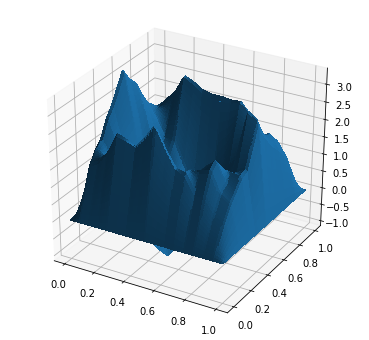

In [2]:
circle = datasets.make_circles(noise=0.05)
operation.data=circle
combiObject.perform_operation(minimum_level, maximum_level)
combiObject.plot()

Example with the old faithful geyser dataset:

0 [1, 4] 1.0
1 [2, 3] 1.0
2 [3, 2] 1.0
3 [4, 1] 1.0
4 [1, 3] -1.0
5 [2, 2] -1.0
6 [3, 1] -1.0
Indexlist:  [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15)]
Levelvector:  [1 4]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 1)
Domain:  [0.0, 0.0] [1.0, 0.125]
----------------------------------------------------------------------------------------------------
Calculating
Gridpoints:  (1, 1) (1, 2)
Domain:  [0.0, 0.0] [1.0, 0.1875]
Result:  0.0034740708360727433
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 3)
----------------------------------------------------------------------------------------------------
Skipping calculation
Gridpoints:  (1, 1) (1, 4)
-----------------------------------------------------------------------

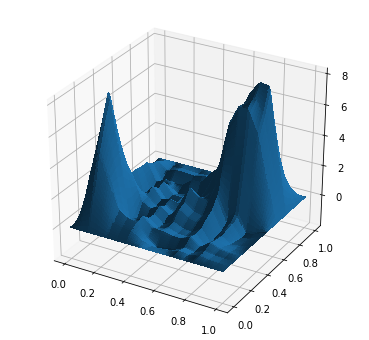

In [3]:
oldFaithfulDataset = (
    [[3.600, 79], [1.800, 54], [3.333, 74], [2.283, 62], [4.533, 85], [2.883, 55], [4.700, 88], [3.600, 85],
     [1.950, 51],
     [4.350, 85], [1.833, 54], [3.917, 84], [4.200, 78], [1.750, 47], [4.700, 83], [2.167, 52], [1.750, 62],
     [4.800, 84],
     [1.600, 52], [4.250, 79], [1.800, 51], [1.750, 47], [3.450, 78], [3.067, 69], [4.533, 74], [3.600, 83],
     [1.967, 55],
     [4.083, 76], [3.850, 78], [4.433, 79], [4.300, 73], [4.467, 77], [3.367, 66], [4.033, 80], [3.833, 74],
     [2.017, 52],
     [1.867, 48], [4.833, 80], [1.833, 59], [4.783, 90], [4.350, 80], [1.883, 58], [4.567, 84], [1.750, 58],
     [4.533, 73],
     [3.317, 83], [3.833, 64], [2.100, 53], [4.633, 82], [2.000, 59], [4.800, 75], [4.716, 90], [1.833, 54],
     [4.833, 80],
     [1.733, 54], [4.883, 83], [3.717, 71], [1.667, 64], [4.567, 77], [4.317, 81], [2.233, 59], [4.500, 84],
     [1.750, 48],
     [4.800, 82], [1.817, 60], [4.400, 92], [4.167, 78], [4.700, 78], [2.067, 65], [4.700, 73], [4.033, 82],
     [1.967, 56],
     [4.500, 79], [4.000, 71], [1.983, 62], [5.067, 76], [2.017, 60], [4.567, 78], [3.883, 76], [3.600, 83],
     [4.133, 75],
     [4.333, 82], [4.100, 70], [2.633, 65], [4.067, 73], [4.933, 88], [3.950, 76], [4.517, 80], [2.167, 48],
     [4.000, 86],
     [2.200, 60], [4.333, 90], [1.867, 50], [4.817, 78], [1.833, 63], [4.300, 72], [4.667, 84], [3.750, 75],
     [1.867, 51],
     [4.900, 82], [2.483, 62], [4.367, 88], [2.100, 49], [4.500, 83], [4.050, 81], [1.867, 47], [4.700, 84],
     [1.783, 52],
     [4.850, 86], [3.683, 81], [4.733, 75], [2.300, 59], [4.900, 89], [4.417, 79], [1.700, 59], [4.633, 81],
     [2.317, 50],
     [4.600, 85], [1.817, 59], [4.417, 87], [2.617, 53], [4.067, 69], [4.250, 77], [1.967, 56], [4.600, 88],
     [3.767, 81],
     [1.917, 45], [4.500, 82], [2.267, 55], [4.650, 90], [1.867, 45], [4.167, 83], [2.800, 56], [4.333, 89],
     [1.833, 46],
     [4.383, 82], [1.883, 51], [4.933, 86], [2.033, 53], [3.733, 79], [4.233, 81], [2.233, 60], [4.533, 82],
     [4.817, 77],
     [4.333, 76], [1.983, 59], [4.633, 80], [2.017, 49], [5.100, 96], [1.800, 53], [5.033, 77], [4.000, 77],
     [2.400, 65],
     [4.600, 81], [3.567, 71], [4.000, 70], [4.500, 81], [4.083, 93], [1.800, 53], [3.967, 89], [2.200, 45],
     [4.150, 86],
     [2.000, 58], [3.833, 78], [3.500, 66], [4.583, 76], [2.367, 63], [5.000, 88], [1.933, 52], [4.617, 93],
     [1.917, 49],
     [2.083, 57], [4.583, 77], [3.333, 68], [4.167, 81], [4.333, 81], [4.500, 73], [2.417, 50], [4.000, 85],
     [4.167, 74],
     [1.883, 55], [4.583, 77], [4.250, 83], [3.767, 83], [2.033, 51], [4.433, 78], [4.083, 84], [1.833, 46],
     [4.417, 83],
     [2.183, 55], [4.800, 81], [1.833, 57], [4.800, 76], [4.100, 84], [3.966, 77], [4.233, 81], [3.500, 87],
     [4.366, 77],
     [2.250, 51], [4.667, 78], [2.100, 60], [4.350, 82], [4.133, 91], [1.867, 53], [4.600, 78], [1.783, 46],
     [4.367, 77],
     [3.850, 84], [1.933, 49], [4.500, 83], [2.383, 71], [4.700, 80], [1.867, 49], [3.833, 75], [3.417, 64],
     [4.233, 76],
     [2.400, 53], [4.800, 94], [2.000, 55], [4.150, 76], [1.867, 50], [4.267, 82], [1.750, 54], [4.483, 75],
     [4.000, 78],
     [4.117, 79], [4.083, 78], [4.267, 78], [3.917, 70], [4.550, 79], [4.083, 70], [2.417, 54], [4.183, 86],
     [2.217, 50],
     [4.450, 90], [1.883, 54], [1.850, 54], [4.283, 77], [3.950, 79], [2.333, 64], [4.150, 75], [2.350, 47],
     [4.933, 86],
     [2.900, 63], [4.583, 85], [3.833, 82], [2.083, 57], [4.367, 82], [2.133, 67], [4.350, 74], [2.200, 54],
     [4.450, 83],
     [3.567, 73], [4.500, 73], [4.150, 88], [3.817, 80], [3.917, 71], [4.450, 83], [2.000, 56], [4.283, 79],
     [4.767, 78],
     [4.533, 84], [1.850, 58], [4.250, 83], [1.983, 43], [2.250, 60], [4.750, 75], [4.117, 81], [2.150, 46],
     [4.417, 90],
     [1.817, 46], [4.467, 74]], 0)

operation.data = oldFaithfulDataset
combiObject.perform_operation(minimum_level, maximum_level)
combiObject.plot()